<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Начало-работы" data-toc-modified-id="Начало-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Начало работы</a></span><ul class="toc-item"><li><span><a href="#Цель-работы" data-toc-modified-id="Цель-работы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель работы</a></span></li><li><span><a href="#Импортирование-и-первоначальная-настройка" data-toc-modified-id="Импортирование-и-первоначальная-настройка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импортирование и первоначальная настройка</a></span></li><li><span><a href="#Чтение-и-изучение-данных" data-toc-modified-id="Чтение-и-изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Чтение и изучение данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-самолёты" data-toc-modified-id="Самые-популярные-самолёты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Самые популярные самолёты</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Популярные-города" data-toc-modified-id="Популярные-города-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Популярные города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Начало работы

### Цель работы

<big>Выяснить какие города и самолёты пользуются наибольшей популярностью.</big>

### Импортирование и первоначальная настройка

In [1]:
import warnings

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# Форматирование стандартного вывода
class formatter:
    purple = '\033[95m'
    cyan = '\033[96m'
    darkcyan = '\033[36m'
    blue = '\033[94m'
    green = '\033[92m'
    yellow = '\033[93m'
    red = '\033[91m'
    bold = '\033[1m'
    underline = '\033[4m'
    reset = '\033[0m'

### Чтение и изучение данных

In [2]:
planes_df = pd.read_csv('/datasets/query_1.csv')
cities_df = pd.read_csv('/datasets/query_3.csv')

In [3]:
# Вывод наиболее подробной информации о таблице
def display_info(data):
    print(formatter.bold + 'Содержание:' + formatter.reset)
    display(data.head())
    
    print(formatter.bold + 'Информация о столбцах:' + formatter.reset)
    display(data.info())
    
    print(formatter.bold + 'Описательные статистики:' + formatter.reset)
    display(data.describe())
    
    print(formatter.bold + 'Пропуски:' + formatter.reset)
    display(data.isna().mean())
    
    print(f'{formatter.bold}Количество дубликатов: {formatter.reset}{data.duplicated().sum()}')

In [4]:
display_info(planes_df)

Содержание:


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Описательные статистики:


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Пропуски:


model             0.0
flights_amount    0.0
dtype: float64

Количество дубликатов: 0


<big>
    <ul>
        <li>Проблем в данных не наблюдается</li>
    </ul>
</big>

In [5]:
display_info(cities_df)

Содержание:


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Описательные статистики:


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Пропуски:


city               0.0
average_flights    0.0
dtype: float64

Количество дубликатов: 0


<big>
    <ul>
        <li>Проблем в данных не наблюдается</li>
    </ul>
</big>

## Анализ данных

### Самые популярные самолёты

In [6]:
def show_barh(x, y, xlabel='', ylabel=''):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    ax.barh(y, x)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()

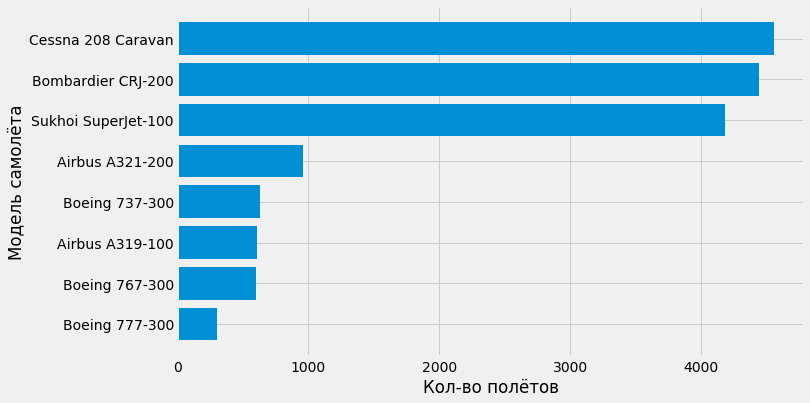

In [7]:
planes_df.sort_values(by='flights_amount', inplace=True)
show_barh(
    x=planes_df['flights_amount'], y=planes_df['model'],
    xlabel='Кол-во полётов', ylabel='Модель самолёта'
)

<big>
    <b>Вывод:</b>
    <ul>
        <li>Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet-100 сильно выделяются на фоне остальных самолётов. Они имеют более 4000 прилётов в день.</li>
        <li>Airbus и Boeing пользуются примерно одинаковой популярностью. В среднем около 500 прилётов.</li>
    </ul>
</big>

### Топ-10 городов по количеству рейсов

In [8]:
cities_top10_df = cities_df.sort_values(by='average_flights').tail(10)
cities_top10_df.reset_index(inplace=True, drop=True)
cities_top10_df

,city,average_flights
0,Ульяновск,9.580645
1,Сочи,9.612903
2,Брянск,10.000000
3,Пермь,10.129032
4,Ростов-на-Дону,10.193548
5,Екатеринбург,11.322581
6,Красноярск,11.580645
7,Новосибирск,17.322581
8,Санкт-Петербург,31.161290
9,Москва,129.774194


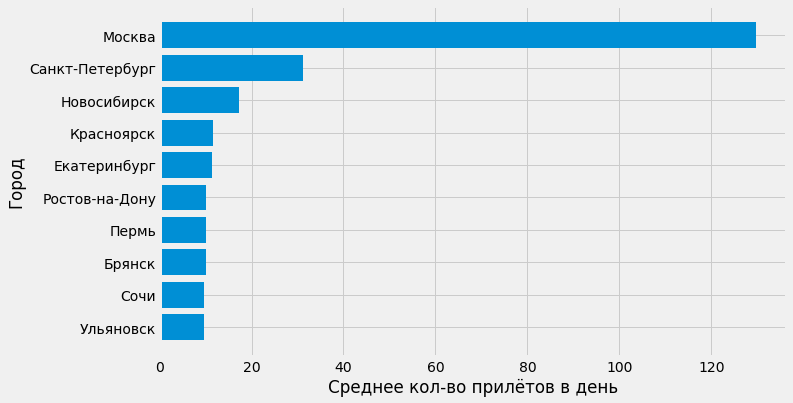

In [9]:
show_barh(
    x=cities_top10_df['average_flights'], y=cities_top10_df['city'],
    xlabel='Среднее кол-во прилётов в день', ylabel='Город'
)

<big>
    <b>Вывод:</b>
    <ul>
        <li>Ожидаемо Москва сильно выделятся среди остальных городов - 130 прилётов. Это связанно с численностью населения города и тем, что некоторые рейсы проходят с пересадкой через Москву.</li>
        <li>Также немного выделяются Санкт-Петербург и Новосибирск, остальные города имеют примерно одинаковое количество прилётов, около 10.</li>
    </ul>
</big>

### Популярные города

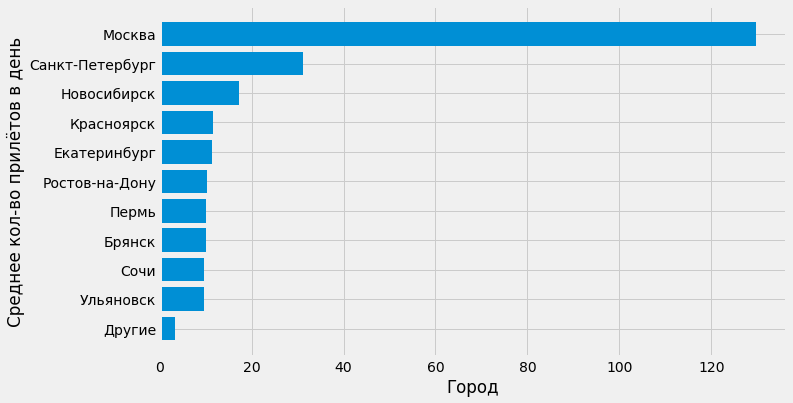

In [10]:
treshold = cities_top10_df.loc[0, 'average_flights']
mean = cities_df.loc[cities_df['average_flights'] < treshold, 'average_flights'].mean()

cities_vis_df = cities_top10_df.copy()
cities_vis_df.loc[cities_vis_df.size] = ['Другие', mean]
cities_vis_df.sort_values(by='average_flights', inplace=True)
cities_vis_df.head(20)

show_barh(
    x=cities_vis_df['average_flights'], y=cities_vis_df['city'],
    xlabel='Город', ylabel='Среднее кол-во прилётов в день'
)

<big>
    <b>Вывод:</b>
    <ul>
        <li>Другие, не входящие в топ-10, города имеют очень низкое количество прилётов в день, меньше 5.</li>
    </ul>
</big>

## Общий вывод

<big>
    <ul>
        <li>Больше всего прилётов в день совершается в Москву.</li>
        <li>Чаще всего совершают полёт небольшие самолёты Cessna 208 Caravan, Bombardier CRJ-200 и среднего размера пассажирский Sukhoi Superjet-100.</li>
    </ul>
</big>